In [1]:
import sys
sys.path.append('f:/Python/AgenticEuro2025/src/')
from agentic_rag import AgenticRAG
from embeddings.embedding_factory import EmbeddingFactory
from models.model_factory import ModelFactory
from vector_stores.faiss_store import FAISSStore
from dotenv import load_dotenv
load_dotenv('../.env')

model = ModelFactory("openai").create_model()
embedding_model = EmbeddingFactory("ollama").create_embedding()
store = FAISSStore(embedding_model)
store.load_vector_store()

graph = AgenticRAG(store)
from pprint import pprint
from langchain_core.messages import  BaseMessage, HumanMessage

query = {"messages": [HumanMessage("how can i buy tickets?")], "question_language": "Spanish"}
#query = {"messages": [HumanMessage("what can you say about argentina?")], "question_language": "English"}

print(graph.graph.invoke(query)["messages"][-1].content)

Puedes comprar boletos en womenseuro.com y ticketcorner.ch. Se aconseja visitar el portal de boletos a la hora exacta de inicio de la venta a las 11:00 CET, cuando se abre la cola.


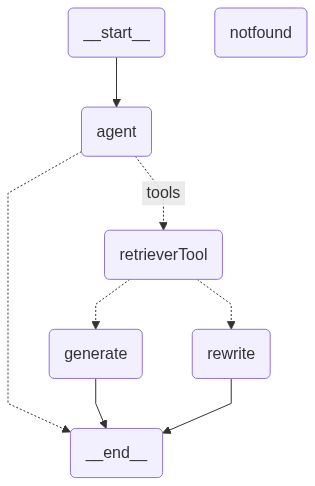

In [2]:
from IPython.display import Image, display
display(Image(graph.graph.get_graph().draw_mermaid_png()))